In [133]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

# Perceptron & Logistic Regression 

$$\newline \textbf{If you are using online resources, please cite the source as well as the search queries (ex. the question you looked up on Google or ChatGPT)} \newline$$

### The goal of this assignment is to practice and learn how to use Python to build a perceptron classifier and a logistic regression classifier for a given binary classification task.





#### Part 1: Perceptron  
In this part of the assignment, we will be building a perceptron class. 
##### Introduction:

W and b are the weight(s) and the bias for the perceptron classifier. W is an n-dimensional vector where n is the number of features the dataset has, and the bias b is a scalar (a quantity that only has magnitude). The process of fitting is to optimize them using gradient descent. To predict whether the label $y_{i}$ (our target)  is 1 or -1, we calculate $sign(wx_{i}+b)$. The sign function we are using here is:
 $$ sign(x) =\begin{cases} 1  & x > 0  \\ -1 & x  \leq 0 \end{cases} $$ 

In other words, if the sample $x_{i}$ projected by w plus the bias b is larger than 0, we predict $y_{i}$ to be 1, otherwise, we predict $y_{i}$ to be -1. 

Hence, the decision boundary of the perceptron classifier is: 
$$ Wx + b = 0 $$
A decision boundary is a hyperplane (or a line if data is 2d) where samples that are classified as one class lie on one side and the samples on the other side are classified as the other class.

The error is zero if our prediction matches the target, and it is 1 if our prediction is different from the target. Since our target can be either -1 or 1, we can formulate our error function as:

$$ \epsilon_{i} = \frac{1}{2}(y_{i} - sign(wx_{i}+b))^{2} =\frac{1}{2} (y_{i} - sign( \sum_{j} \{ w_{j}x_{ij}\}+b ))^{2} $$ 
, where j is the jth feature.

In each epoch, we loop through the entire training dataset. For each sample, we make a prediction using our current w and b. We update our weights and bias only when the prediction is incorrect.

The gradient of our error function is used to update our weights and the bias. 
The gradient of $\epsilon_{i}$:
$$\frac{\partial \epsilon_{i}}{\partial w} =  \begin{cases} x_{i} & \text{predicted = 1 \& target = -1}  \\ -x_{i}  & \text{predicted = -1 \& target = 1} \end{cases}$$

$$\frac{\partial \epsilon_{i}}{\partial b} =  \begin{cases} y_{i} & \text{predicted = 1 \& target = -1 } \\ -y_{i} &  \text{predicted = -1 \& target = 1 }\end{cases}$$

Another way of writing the derivatives is :
$$\frac{\partial \epsilon_{i}}{\partial w} =  -y_{i}\cdot x_{i} $$
$$\frac{\partial \epsilon_{i}}{\partial b} =  -y_{i}  $$
For each incorrectly predicted sample, we update w and b :
$$ w = w - \alpha  \frac{\partial \epsilon_{i}}{\partial w} $$ 
$$ b = b - \alpha  \frac{\partial \epsilon_{i}}{\partial b} $$
, where $\alpha$ is the learning rate. 

Notice that since the derivative is negative, this means you will be adding either $y_{i}\cdot x_{i}$ or $y_{i}$(times the learning rate).

The following are the necessary components of the perceptron class:

1. Instance attribute `self.w` and `self.b` are the weights and the bias term. We randomly initialize them between -1 and 1. (ex. 0.452)

2. Instance attribute `self.learning_rate`  is $\alpha ,\alpha \in (0,1] $. 
3. Instance attribute `self.epoch` is the number of times we want to loop through the entire training dataset. 
4. Instance attribute `self.x` stores the training data. Instance attribute `self.y` stores the training labels.
5. Instance attribute `self.x_test` stores the test data. Instance attribute `self.y_test` stores the test labels.
6. Instance attribute `self.train_accuracies` stores the training accuracy after each epoch. 
7. Instance attribute `self.test_accuracies` stores the test accuracy after each epoch.
#### 1.1  (10 points)

##### To-do:
You will need to write all of the following instance methods. Some of them might need to call the instance attributes and make modifications to them. You are free to modify the input parameters for the methods, but do use the class object. 

8. Instance method `predict` takes in a data sample (in the first dataset, the input is a data vector from ONE patient), which would be a vector, and returns the predicted label as the output, either -1 or 1. If you would like to optimize your classifier, you can also enable your `predict` method to process data in batches. 
9. Instance method `accuracy` takes in a test dataset and a test label set. It returns the percentage of the samples that are correctly predicted using the current w and b. 
10. Instance method `train` is where we apply gradient descent. We need to loop through the training datasets `self.epoch` number of times, and for each sample that has been incorrectly classified, we need to update the weights and the bias of our classifier. At the end of each epoch, please store the training accuracy and test accuracy in the corresponding instance attributes.

In [134]:
class perceptron:
    def __init__(self, x, y, x_test, y_test, learning_rate, epochs): # 2 point
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test
        self.learning_rate = learning_rate
        self.epoch = epochs
        self.w = np.random.uniform(-1, 1, size=self.x.shape[1]) # searched up np.random.uniform and how to use/implement it
        self.b = np.random.uniform(-1, 1) #https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
        self.train_accuracies = [] #https://www.geeksforgeeks.org/python/numpy-random-uniform-in-python/
        self.test_accuracies = []

    def predict(self, x): # 2 point
        x = x.flatten() # searched up how to ensure shape, i think the flatten() just helps it become (n,)
        linear_output = np.dot(x, self.w) + self.b
        if (linear_output >= 0):
            return 1
        else:
            return -1

    def accuracy(self, x, y):    # 1 point
        correct = 0
        for xi, yi in zip(x, y):
            pred = self.predict(xi)
            if pred == yi:
                correct += 1
        return correct / len(y)

    def train(self):  # 5 point
        for _ in range(self.epoch):
            for i in range(len(self.x)):
                xi = self.x[i]
                yi = self.y[i]
                pred = self.predict(xi)

                if pred != yi:
                    self.w += self.learning_rate * yi * xi
                    self.b += self.learning_rate * yi

            train_acc = self.accuracy(self.x, self.y)
            test_acc = self.accuracy(self.x_test, self.y_test)
            self.train_accuracies.append(train_acc)
            self.test_accuracies.append(test_acc)


#### The dataset:
 The first dataset we will be using is the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset. The cell below is to help you understand the data. Each row i is a data sample recorded from the patient i, we denote as $x_{i}$. The label $y_{i}$ is the diagnosis of that patient, either malignant (-1) or benign (1). 

In [135]:
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
print("The shape of our data:", data.shape)
data.head()


The shape of our data: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



#### 1.2  (3 points)
##### To-do
1. Normalize the dataset using the equation from Assignment 1. (1 point)
2. Convert the labels of the data set into -1 and 1 so that it will work with our perceptron algorithm. (1 point)
3. Split into training and test set using `train_test_split` that has been imported for you. One of the parameters in `train_test_split` is `random_state`. Please is set it to 123. Just making sure we are not tuning `random_state`. Also, set `test_size` to 0.2. (1 point)

In [136]:
data['class'] = breast_cancer.target
X = data.drop('class', axis = 1)
Y = data['class']

X = X.to_numpy(dtype = float)
Y = Y.to_numpy(dtype = float)


# YOUR CODE HERE

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_normalized = (X - mean) / std

Y[Y == 0] = -1

x_train, x_test, y_train, y_test = train_test_split(
    X_normalized, Y, test_size=0.2, random_state=123
)


#### 1.3 (7 points)

##### To-do

1. Train the perceptron classifier and predict the labels for the training dataset. (No need to print the predicted labels.) (1 point)

2. Test the model on the test dataset and print the accuracy score. (1 point)

3. Plot the training accuracy vs epoch graph and test accuracy vs epoch graph using `train_accuracies` and `test_accuracies`. (You can plot them separately or on the same graph.) (1 point)

4. What do you notice when you change the learning rate?  Why do you think what you observed occurred?  (3 points)
Hint: Make large changes, ex. 1E-2 to 1E-5, or even try changing it 1E5. How does it affect convergence from the initial weights, converged weights/bias? What happened to your plot after making those changes?  You might want to run a few tests. 
<br>Write your Answer here:

When I changed the learning rate, I saw different results. With a learning rate of 0.01, the model learned quickly and found good values for the weights and bias. The decision boundary nicely separated the classes. But when the learning rate was very small, like 1e-4, the model learned very slowly. Even after many rounds of training, the weights didn’t change much, and the decision boundary stayed almost the same. This happened because the model was making very tiny updates. On the other hand, if the learning rate was very large, like 100,000 (1e+5), the model became unstable. The weights grew too big or kept jumping around, and the decision boundary changed wildly. The Perceptron algorithm aims to minimize a convex error function, which has one global minimum. The learning rate controls how quickly we move toward that minimum. If the steps are too small, learning takes too long. If the steps are too big, the model misses the best solution and behaves unpredictably. Since the goal is to find one best answer, a good learning rate helps the model get there smoothly.

6. Explain what happens when `epoch` is set too low or too high, and explain why this occurs. (1 point)<br>Write your Answer here:

With the number of epochs, I found that setting the epoch count too low, such as 4, resulted in a model that did not converge. The weights and bias remained close to their random initial values, and the decision boundary failed to properly separate the classes. With 100 epochs, the model mostly converged, producing a good decision boundary. When I increased the epochs to 2000, the weights and bias remained stable after a certain point. This indicated to me that the model had converged and additional training did not improve performance further. This happens because too few epochs mean the model hasn’t had enough time to minimize the loss function effectively. On the other hand, too many epochs do not offer benefits once the model reaches the global minimum. 

Final Test Accuracy: 0.9736842105263158


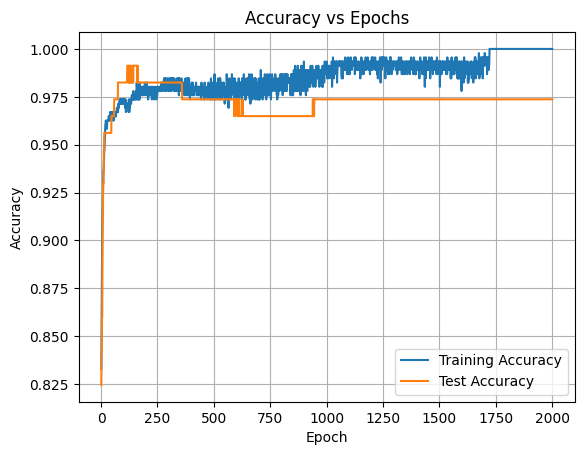

In [137]:
# 1. Train and predict
model = perceptron(x_train, y_train, x_test, y_test, learning_rate = 1e-3, epochs = 2000)
model.train()

# 2. Test and print the accuracy score.
test_acc = model.accuracy(x_test, y_test)
print("Final Test Accuracy:", test_acc)

# 3. Plot the graph.
epochs = list(range(1, model.epoch + 1))

plt.plot(epochs, model.train_accuracies, label='Training Accuracy')
plt.plot(epochs, model.test_accuracies, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

#### 1.4 (2 points)
##### To-do

Train the Sklearn perceptron using the same training dataset and print the test accuracy score after training. You can use accuracy_score from sklearn to help you calculate. We have already imported the function in the first cell. 

Here is the documentation for the Sklearn perceptron. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

Make sure to use the same parameters as you used in your perceptron. It is recommended to read through all of the parameters Sklearn perceptron has. You might have to change some of the default values.

Sklearn perceptron accuracy should only differ from the accuracy of your perceptron by one or two percent. This difference comes from the random initialization of our weights and biases. 

In [138]:
# Train and print out test accruacy score. 
sk_model = Perceptron(eta0=1e-3, max_iter=2000, tol=None, shuffle=False)
sk_model.fit(x_train, y_train)

y_pred = sk_model.predict(x_test)
sk_test_acc = accuracy_score(y_test, y_pred)
print("Sklearn Perceptron Accuracy:", sk_test_acc)

Sklearn Perceptron Accuracy: 0.9824561403508771


### Part 2
In this section, we will be training  our model on a 2-dimensional toy dataset. This way we can visualize its decision boundary. 

Below is the scatterplot of the dataset we will be classifying.

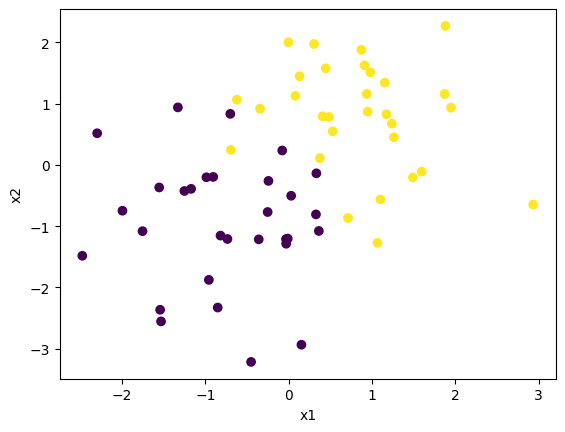

In [139]:
SIZE = 30
np.random.seed(seed=1)
toy_data_0 = np.random.multivariate_normal([-0.75, -0.75], cov=np.array([[1, 0.1],
                                                                         [0.1, 1]]), size=SIZE)
toy_data_1 = np.random.multivariate_normal([0.75, 0.75], cov=np.array([[1, 0],
                                                                       [0, 1]]), size=SIZE)
toy_data = np.vstack((toy_data_0, toy_data_1))
toy_labels = np.hstack((np.ones(SIZE)*-1, np.ones(SIZE)))
plt.scatter(toy_data[:, 0], toy_data[:, 1], c=toy_labels)
plt.xlabel('x1')
plt.ylabel('x2')
X_train, X_test, Y_train, Y_test = train_test_split(toy_data, toy_labels, test_size = 0.3, stratify= toy_labels, random_state = 123)

#### 2.1 (3 points)
##### To-do
1. First, return the weights and the bias prior to training. Store them in variables `w` and `b`.  (1 point)

In [140]:

our_clf= perceptron(X_train, Y_train,X_test,Y_test, learning_rate= 1E-4, epochs=1000)
w = our_clf.w
b = our_clf.b

print(w)  # Do not remove.
print(b)  # Do not remove.

[-0.68641721 -0.9628476 ]
-0.8599557125615553


We denote the data sample (could be any datapoint) as $X = [x_{1},x_{2}] $, weights for our dataset as $W = [w_{1},w_{2}]$, and the bias as $b$.


#### To-do 
2. Complete the equation for the decision boundary in terms of $x_{1}, x_{2},w_{1},w_{2}$ and b. If you are plotting a 2-D 
x-y plot, $x_{2}$ is going to be the value of y.  (1 point) (Write it below)

Hint: derive the equation from the decision boundary equation in part 1 of the introduction. 



$ x_{2} = -\frac{w_{1}x_{1} + b}{w_{2}} $


We can visualize our initial decision boundary.

3. Fill out the missing portion. (1 point)

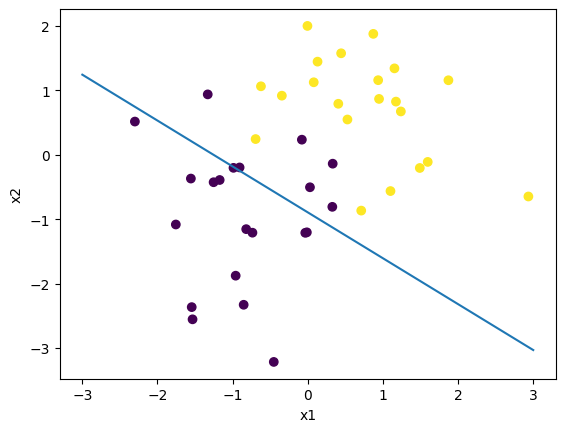

In [141]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
x= np.linspace(-3,3, 100)
x2= (-w[0] * x - b) / w[1] 
plt.plot(x, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### 2.2 (3 points)

##### To-do 
1. Train your perceptron classifier on the dataset. (2 points)
2. Plot the decision boundary of the trained perceptron. (Feel free to borrow the provided code from the problem above.) (1 point)


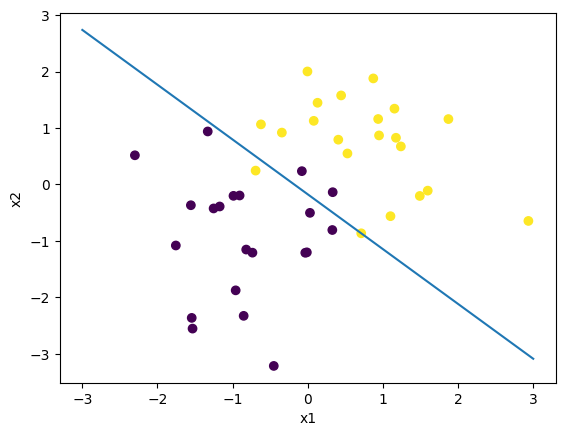

In [142]:
# Write down your code here
our_clf = perceptron(X_train, Y_train, X_test, Y_test, learning_rate=1E-4, epochs=1000)
our_clf.train()

w = our_clf.w
b = our_clf.b

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

x = np.linspace(-3, 3, 100)
x2 = (-w[0] * x - b) / w[1]

plt.plot(x, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#print(f'Accuracy Score: {our_clf.accuracy(X_test, Y_test)}%')

#### Part 3 

#### 3.1 (Breast cancer dataset) (2 points)
Logistic regression is another binary classification algorithm. 


##### To-do:
1. Train the Sklearn logistic regression using the breast cancer training dataset. (1 point)
2. Print the test accuracy score after training. (1 point)

Here is the documentation for the Sklearn logistic regression. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

It is recommended to read through all of the parameters that Sklearn logistic regression has.

In [143]:
# first, I loaded the breast cancer dataset
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target

# then I'm splitting the features and labels
X = data.drop('class', axis=1).to_numpy(dtype=float)
Y = data['class'].to_numpy(dtype=float)

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, stratify=Y, random_state=123
)

# i'm training the logistic regression using the solver liblinear because 
# that's what the documentation in the warning had recommended 
lr_model = sklearn.linear_model.LogisticRegression(solver='liblinear', max_iter=1000, random_state=123, warm_start=False)
lr_model.fit(X_train, Y_train)

# Predict and print accuracy
lr_model_predictions = lr_model.predict(X_test)
print(f'Accuracy score: {accuracy_score(Y_test, lr_model_predictions) * 100:.2f}%')

Accuracy score: 95.91%


#### 3.2 (Use the toy dataset created in Part 2) (3 points)
##### To-do 
1. Train the logistic regression on the toy dataset. (1 point)
2. Print the weights and the bias after training. If you are not sure how to obtain them, Google would be a good resource. (1 point)
3. Plot the decision boundary. You can copy the code from problem 2.  (1 point)

Weights: [[1.6134597  1.55580052]]
Bias: [0.03694647]


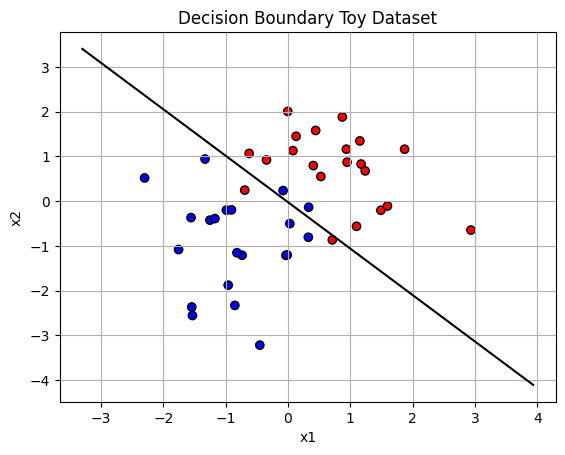

In [144]:
# toy data set form problem 2
SIZE = 30
np.random.seed(seed=1)

toy_data_0 = np.random.multivariate_normal(
    [-0.75, -0.75],
    cov=np.array([[1, 0.1], [0.1, 1]]),
    size=SIZE
)

toy_data_1 = np.random.multivariate_normal(
    [0.75, 0.75],
    cov=np.array([[1, 0], [0, 1]]),
    size=SIZE
)

toy_data = np.vstack((toy_data_0, toy_data_1))
toy_labels = np.hstack((np.ones(SIZE) * -1, np.ones(SIZE))) 

X_train, X_test, Y_train, Y_test = train_test_split(
    toy_data, toy_labels, test_size=0.3, stratify=toy_labels, random_state=123
)

#Train your Model
logreg_toy = sklearn.linear_model.LogisticRegression()
logreg_toy.fit(X_train, Y_train)

# Print out the weights and the bias. 
print("Weights:", logreg_toy.coef_)
print("Bias:", logreg_toy.intercept_)

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='bwr', edgecolors='k')

# Plot the decision boundary.
w = logreg_toy.coef_[0]
b = logreg_toy.intercept_[0]

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x = np.linspace(x_min, x_max, 100)
x2 = -(w[0] * x + b) / w[1]

plt.plot(x, x2, color='black')  # <-- this was missing
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Decision Boundary Toy Dataset")
plt.grid(True)
plt.show()

#googled how to obtain weights and bias https://www.geeksforgeeks.org/deep-learning/the-role-of-weights-and-bias-in-neural-networks/

$$\newline \textbf{If you are using online resources, please cite the source as well as the search queries (ex. the question you looked up on Google or ChatGPT)} \newline$$
### Submission: Please submit the ipynb notebook file to Gradescope. Thanks.